## Carga de librerias

In [2]:
# Importo todas las librerías que usea
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from wordcloud import WordCloud
import squarify
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score



## Carga de Dataset

In [3]:
# Cargar el dataset
file_path = 'OSHA.csv'
df = pd.read_csv(file_path)
df.head()

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,...,Event type,evn_factor,Environmental Factor,hum_factor,Human Factor,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht
0,220982664,8/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,...,Caught in or between,2,Catch Point/Puncture Action,14,Other,1,Regularly Assigned,0,0,0
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,...,Caught in or between,18,Other,10,Position Inappropriate For Task,1,Regularly Assigned,0,0,0
2,220967632,6/30/2017,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,...,Other,18,Other,4,Malfunction In Securing/Warning Op,2,Not Regularly Assigned,0,0,0
3,220969901,6/30/2017,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,...,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,14,Other,1,Regularly Assigned,0,15,0
4,220977748,6/23/2017,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,...,Struck-by,6,Overhead Moving/Falling Object Action,15,Insufficient/Lack/Housekeeping Program,1,Regularly Assigned,0,0,0


## Nombres de Columnas

In [4]:
# Mostrar los nombres de las columnas del DataFrame
column_names = df.columns
print(column_names)

Index(['summary_nr', 'Event Date', 'Abstract Text', 'Event Description',
       'Event Keywords', 'con_end', 'Construction End Use', 'build_stor',
       'Building Stories', 'proj_cost', 'Project Cost', 'proj_type',
       'Project Type', 'Degree of Injury', 'nature_of_inj', 'Nature of Injury',
       'part_of_body', 'Part of Body', 'event_type', 'Event type',
       'evn_factor', 'Environmental Factor', 'hum_factor', 'Human Factor',
       'task_assigned', 'Task Assigned', 'hazsub', 'fat_cause', 'fall_ht'],
      dtype='object')


## Creacion Grafico de Palabras Claves 

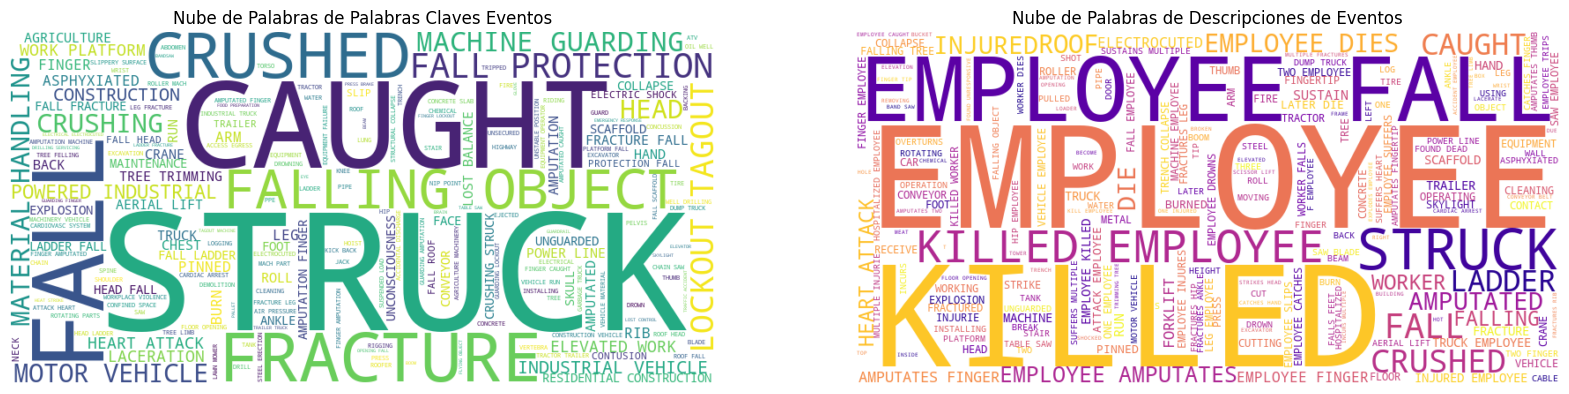

In [5]:
#Quiero ver las palabras que mas se repiten en las Palabras Claves del Evento y Descripcion del Evento
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combinar todo el texto de la columna 'Event Keywords' en una sola cadena
text1 = " ".join(description for description in df['Event Keywords'].dropna())

# Generar la primera nube de palabras
wordcloud1 = WordCloud(width=800, height=400, background_color='white', colormap='viridis', 
                       max_words=200, contour_width=3, contour_color='steelblue').generate(text1)

# Generar la segunda nube de palabras 
text2 = " ".join(description for description in df['Event Description'].dropna())
wordcloud2 = WordCloud(width=800, height=400, background_color='white', colormap='plasma', 
                       max_words=200, contour_width=3, contour_color='black').generate(text2)

# Crear la figura con dos subgráficos
plt.figure(figsize=(20, 20))

# Primer subgráfico
plt.subplot(1, 2, 1)  
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Palabras Claves Eventos')

# Segundo subgráfico
plt.subplot(1, 2, 2)  
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Descripciones de Eventos')

# Mostrar los gráficos
plt.show()

#No sabia si contaba como grafico pero me gusto hacerlo por eso lo deje

## Grafico de barras Verticales

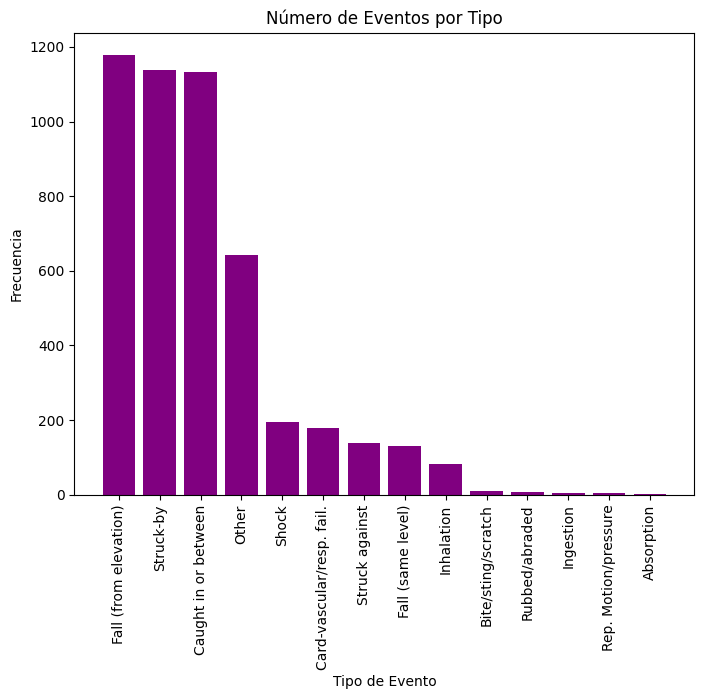

In [6]:
# Contar la frecuencia de cada tipo de evento
event_counts = df['Event type'].value_counts() #Cuentos la cantidad de veces que se produce un accidente de trabajo en base a un evento en particular

# Crear el gráfico de barras verticales
plt.figure(figsize=(8, 6))
plt.bar(event_counts.index, event_counts.values, color='purple')
plt.title('Número de Eventos por Tipo')
plt.xlabel('Tipo de Evento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

## Creacion de Grafico de Torta

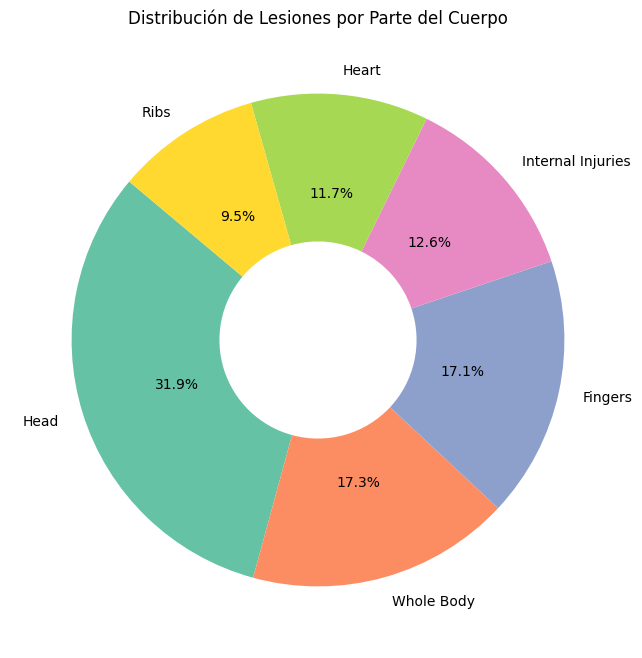

In [7]:
# Contar la frecuencia de cada parte del cuerpo 
part_counts = df['Part of Body'].value_counts().nlargest(6) #Cuento la cantidad de veces que se repite un accidente  y elegi los 6 primeros

# Crear el gráfico de anillo
plt.figure(figsize=(10, 8))
plt.pie(part_counts, labels=part_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('Set2').colors, wedgeprops=dict(width=0.6))
plt.title('Distribución de Lesiones por Parte del Cuerpo')
plt.show()

## Grafico Temporal de accidentes

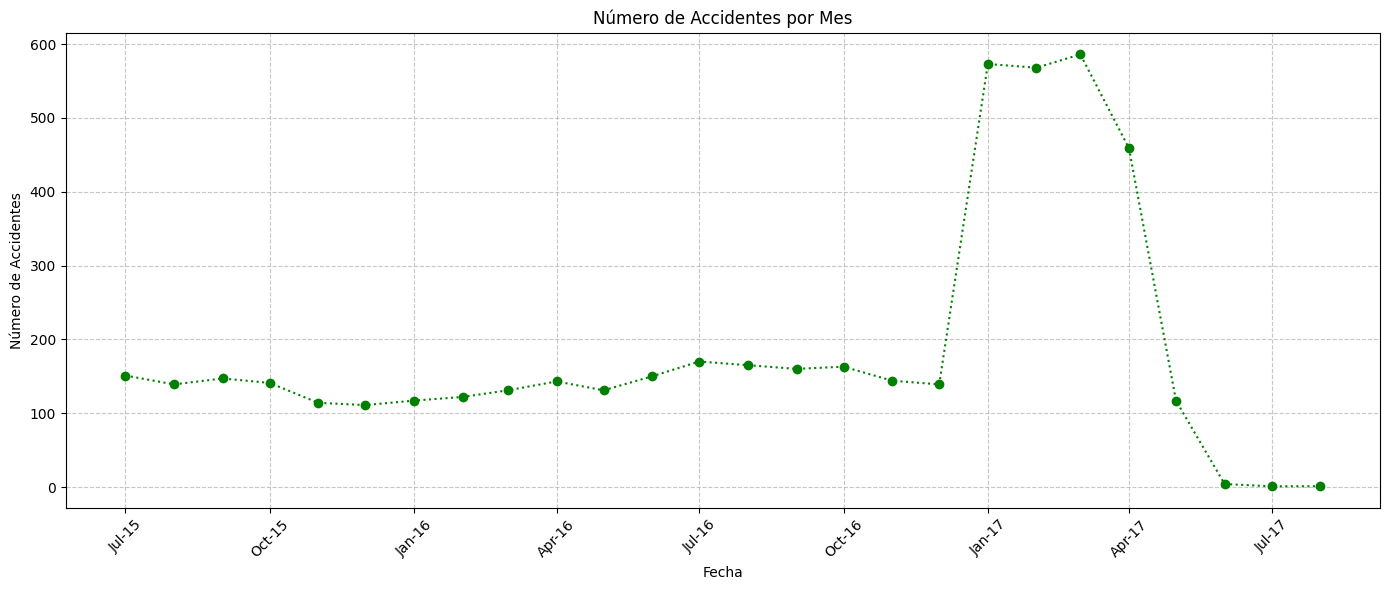

In [8]:
 #Analizar los accidentes por mes y por año 
import matplotlib.dates as mdates

# Convertir la columna 'Event Date' a tipo datetime
df['Event Date'] = pd.to_datetime(df['Event Date'], errors='coerce')

# Extraer el año y el mes de la fecha del evento
df['YearMonth'] = df['Event Date'].dt.to_period('M')

# Contar la cantidad de eventos por año y mes
events_by_month = df['YearMonth'].value_counts().sort_index()

# Convertir el índice a formato datetime para el gráfico
events_by_month.index = events_by_month.index.to_timestamp()

# Crear el gráfico lineal para mostrar los accidentes por mes
plt.figure(figsize=(14, 6))
plt.plot(events_by_month.index, events_by_month.values, marker='o', linestyle=':', color='g')
plt.title('Número de Accidentes por Mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Accidentes')

# Configurar el formato del eje x para mostrar "Mes-Año"
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajusta el diseño para evitar el recorte de etiquetas
plt.show()

## Grafico de Barras Horizontales para determinar la frecuencia de factor humano asocido al accidete

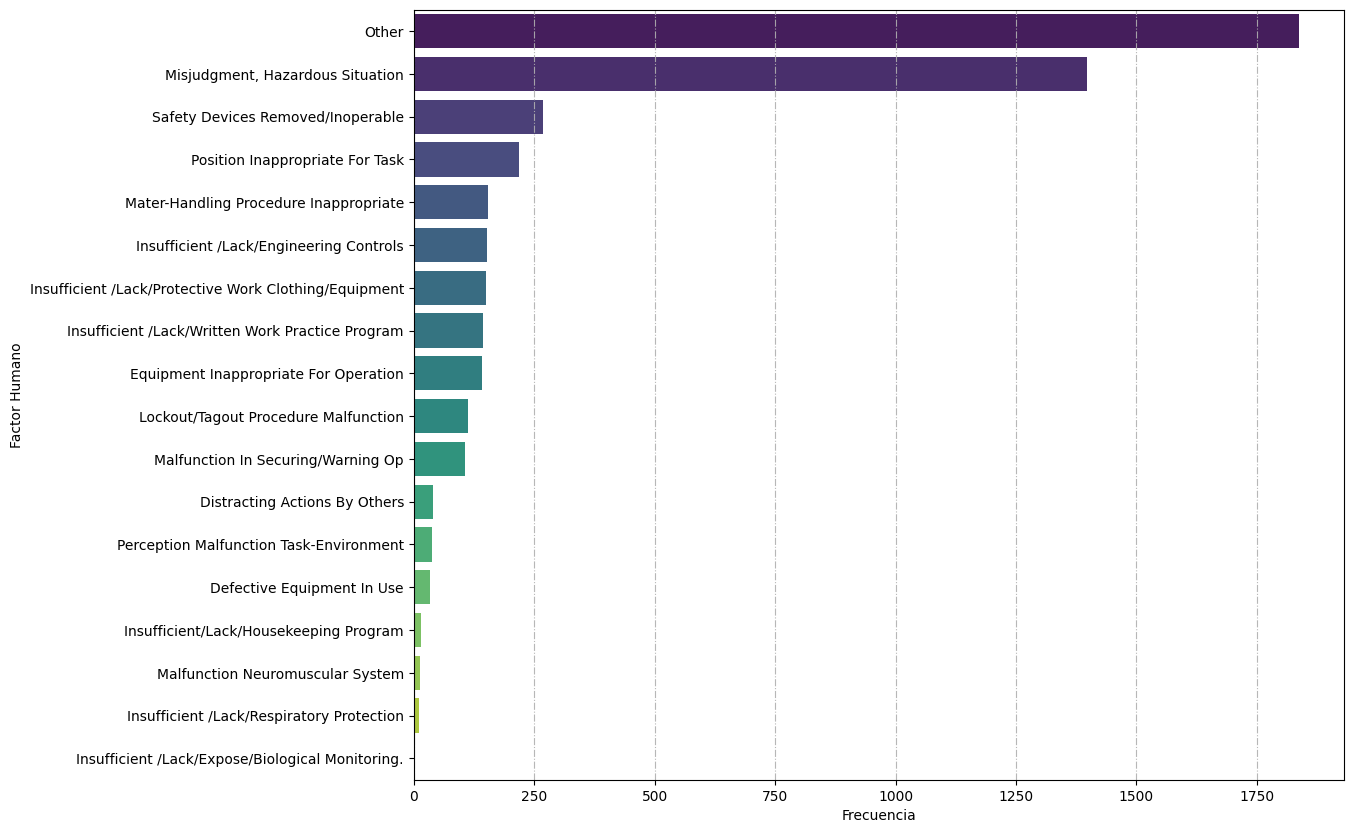

In [9]:

# Contar la frecuencia de cada factor 
part_counts = df['Human Factor'].value_counts()

# Convertir los datos a un DataFrame para seaborn
part_df = part_counts.reset_index()
part_df.columns = ['Human Factor', 'Frecuencia']

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 10))
sns.barplot(x='Frecuencia', y='Human Factor', data=part_df, hue='Human Factor', palette='viridis', legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Factor Humano')
plt.grid(axis='x', linestyle='-.', alpha=0.9)
plt.show()

## Grafico para comparar la relacion entre las partes del cuerpo y el grado de lesion (Fatal o no)

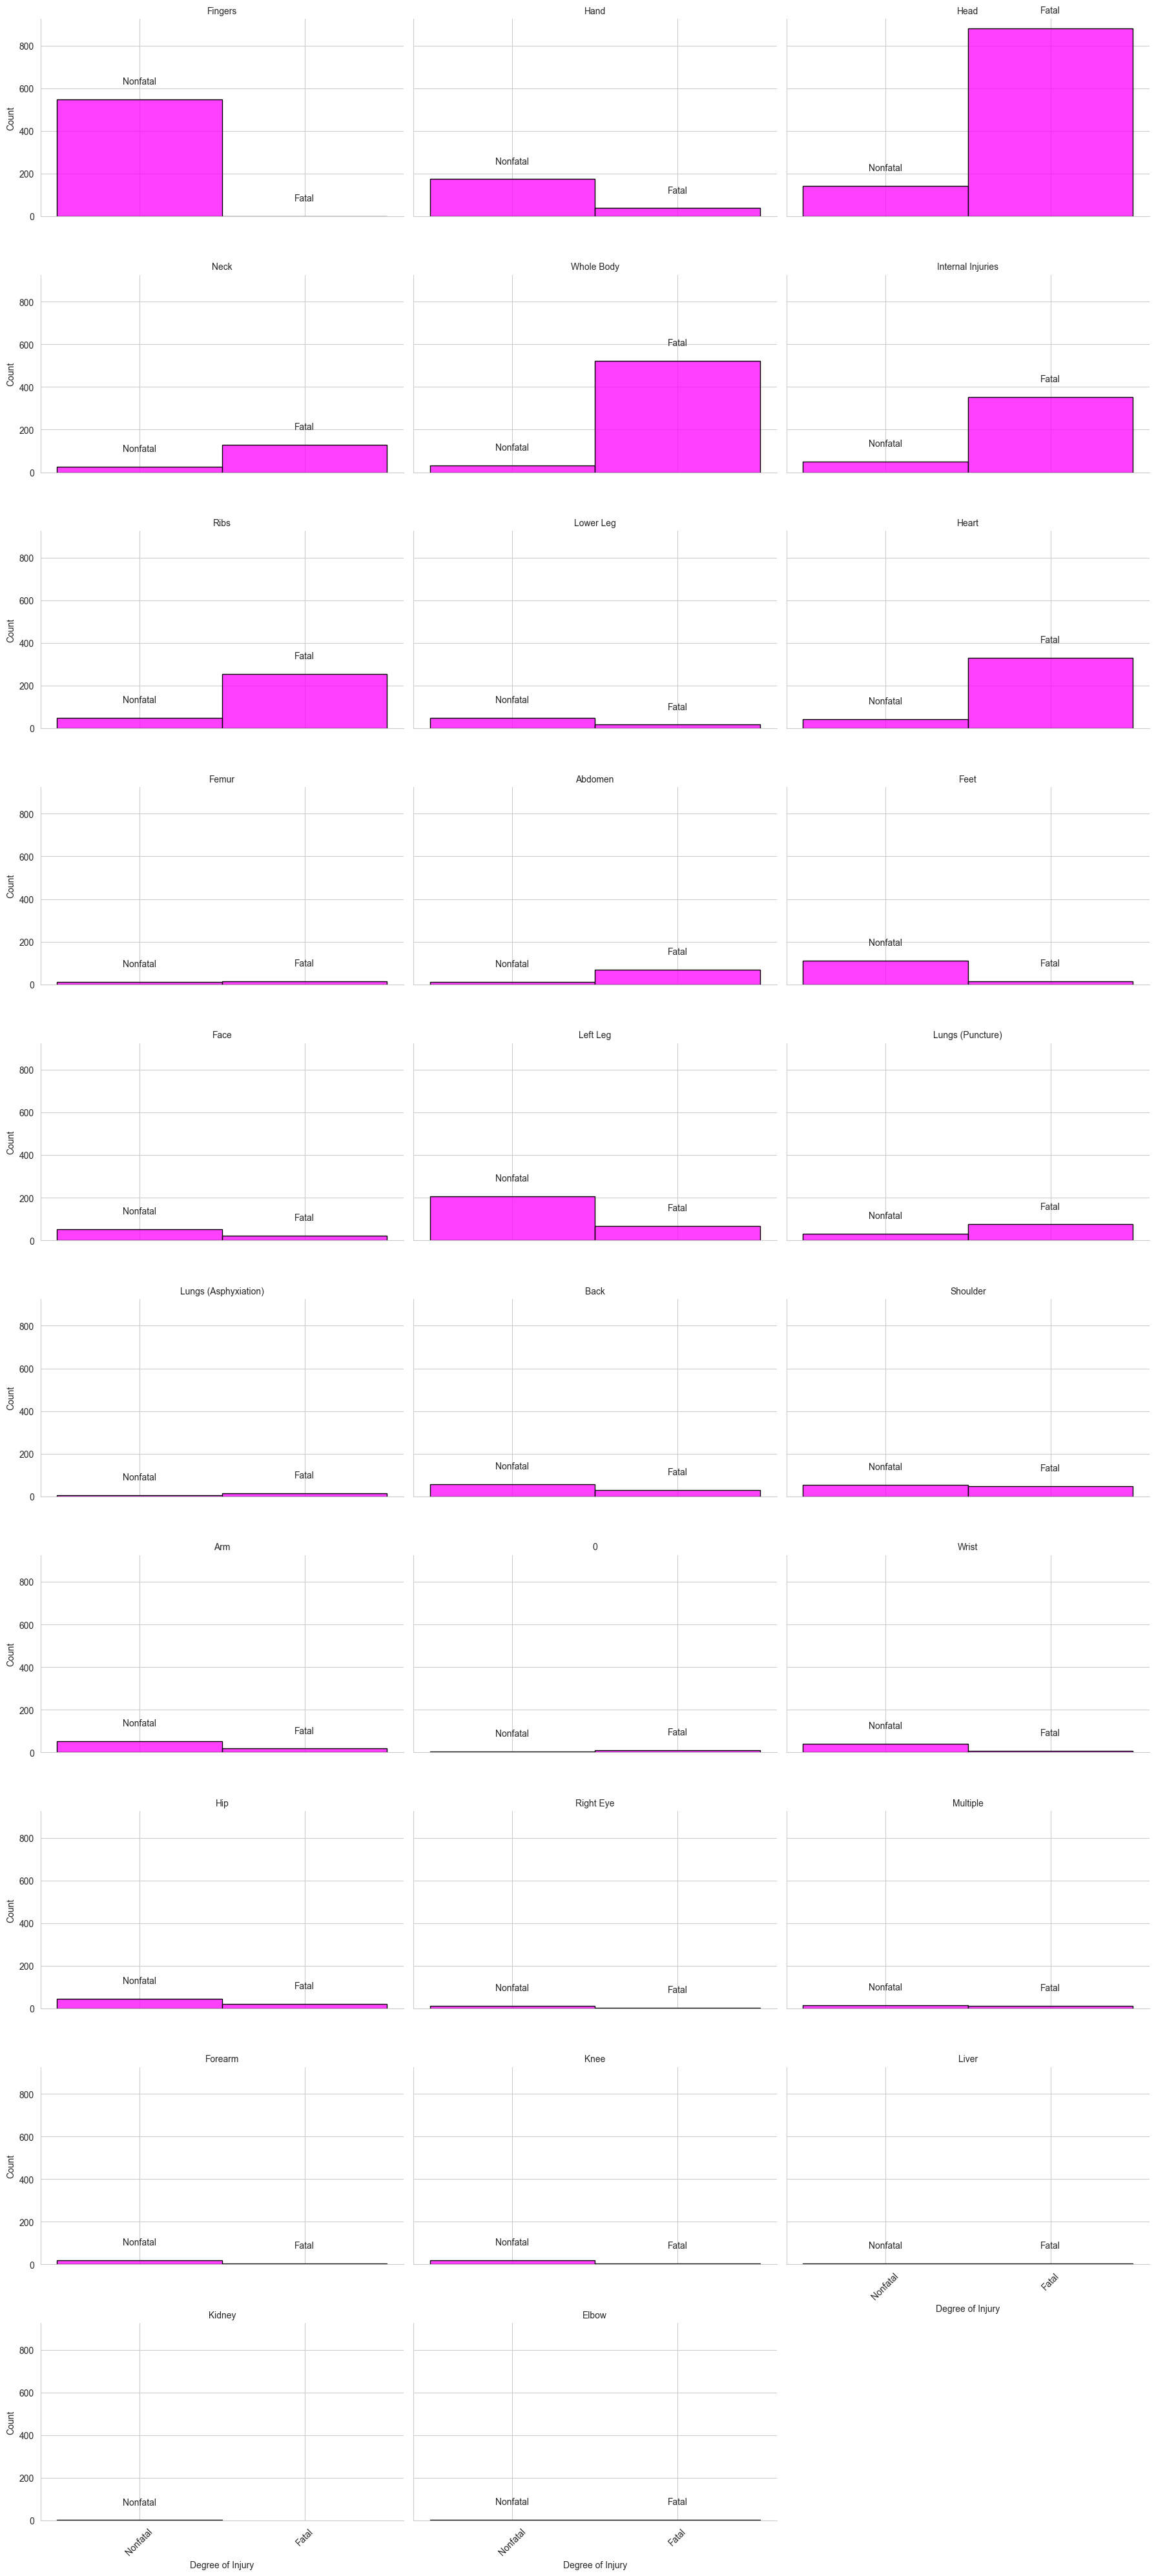

In [10]:

# Configurar el estilo de Seaborn
sns.set_style('whitegrid')

# Crear el FacetGrid con ajustes mejorados
g = sns.FacetGrid(df, 
                  col='Part of Body', 
                  col_wrap=3,       # Número de gráficos por fila
                  height=4,         # Altura de cada gráfico
                  aspect=1.5)       # Relación de aspecto de cada gráfico

# Mapear el histograma en cada faceta
g.map(sns.histplot, 
      'Degree of Injury', 
      bins=1,               # Número de bins en el histograma
      color='magenta',       # Color de las barras
      edgecolor='black')     # Color del borde de las barras

# Obtener los valores únicos de 'Degree of Injury'
unique_injuries = df['Degree of Injury'].unique()

# Añadir etiquetas sobre las barras
for ax in g.axes.flat:
    for p in ax.patches:
        # Obtener el índice de la barra para encontrar el valor correspondiente en unique_injuries
        idx = int(p.get_x() + p.get_width() / 2)
        
        # Asegurarse de que el índice esté dentro del rango de valores únicos
        if idx < len(unique_injuries):
            injury_label = unique_injuries[idx]
        else:
            injury_label = "Unknown"
        
        ax.annotate(f'{injury_label}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 20), 
                    textcoords='offset points')


# Ajustar los títulos de cada faceta
g.set_titles(col_template="{col_name}", fontsize=14)

# Etiquetas de los ejes
g.set_axis_labels("Degree of Injury", "Count")

# Rotar las etiquetas del eje x si es necesario
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Ajustar espacios entre gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# -PARTE DOS

## Transformacion de mi columna objetivo

In [11]:
# Transformar la columna 'Degree of Injury'
df['Degree of Injury'] = df['Degree of Injury'].map({'Nonfatal': 0, 'Fatal': 1}) #Tranformo varaibles categoricas en numericas

## Selccion de las variables numericas 

In [12]:
# Seleccionar solo las columnas que contienen datos numéricos
df_numerico = df.select_dtypes(include=['number'])

# Eliminar la columna 'summary_nr' que es numérica pero no aporta, es el ID de la base de datos
df_numerico = df_numerico.drop(columns=['summary_nr'])

# Mostrar el DataFrame con formato en Jupyter Notebook me es mas comodo de ver
styled_df = df_numerico.head().style.format("{:.2f}").set_caption("Primeras 20 filas del DataFrame Numérico")

# Mostrar el DataFrame con formato
styled_df


,build_stor,Degree of Injury,nature_of_inj,part_of_body,event_type,evn_factor,hum_factor,task_assigned,fat_cause,fall_ht
0,0.00,0.00,1.00,10.00,2.00,2.00,14.00,1.00,0.00,0.00
1,1.00,0.00,9.00,10.00,2.00,18.00,10.00,1.00,0.00,0.00
2,0.00,0.00,5.00,12.00,14.00,18.00,4.00,2.00,0.00,0.00
3,1.00,1.00,21.00,13.00,5.00,13.00,14.00,1.00,15.00,0.00
4,0.00,0.00,3.00,20.00,1.00,6.00,15.00,1.00,0.00,0.00


## Definicion de mi Variable Objetivo

In [13]:
#Defino mi variable Objetivo del dataset
x = df_numerico.drop(columns=['Degree of Injury'])
y = df['Degree of Injury']

# Dividir el conjunto de datos en entrenamiento y prueba empiezo reserva un 20% de los valores para prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Modelos y Metricas

Entrenando y evaluando el modelo: Random Forest


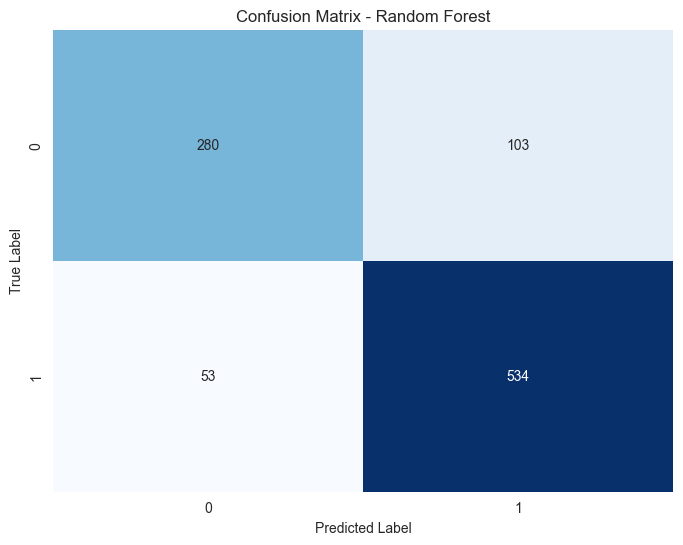

Accuracy: 0.8391752577319588
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       383
           1       0.84      0.91      0.87       587

    accuracy                           0.84       970
   macro avg       0.84      0.82      0.83       970
weighted avg       0.84      0.84      0.84       970

------------------------------------------------------------
Entrenando y evaluando el modelo: XGBoost


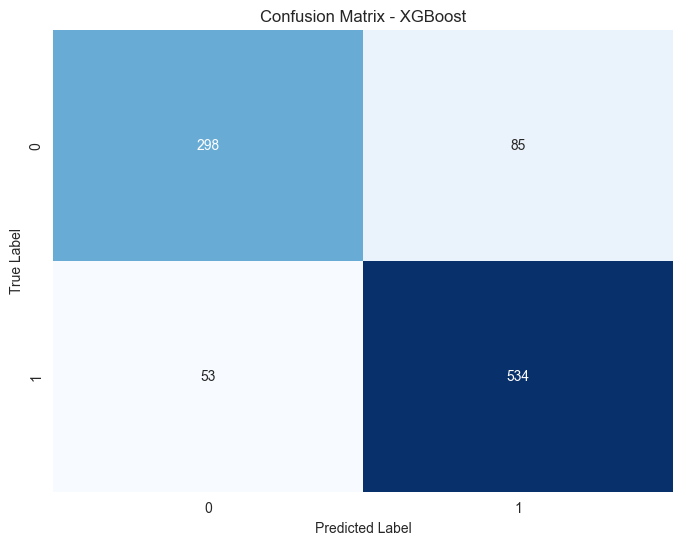

Accuracy: 0.8577319587628865
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       383
           1       0.86      0.91      0.89       587

    accuracy                           0.86       970
   macro avg       0.86      0.84      0.85       970
weighted avg       0.86      0.86      0.86       970

------------------------------------------------------------
Entrenando y evaluando el modelo: KNN


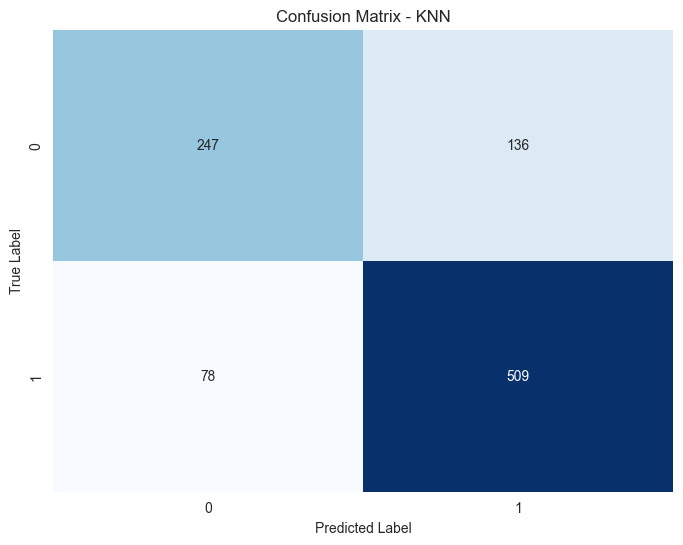

Accuracy: 0.7793814432989691
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       383
           1       0.79      0.87      0.83       587

    accuracy                           0.78       970
   macro avg       0.77      0.76      0.76       970
weighted avg       0.78      0.78      0.78       970

------------------------------------------------------------
Entrenando y evaluando el modelo: SVM


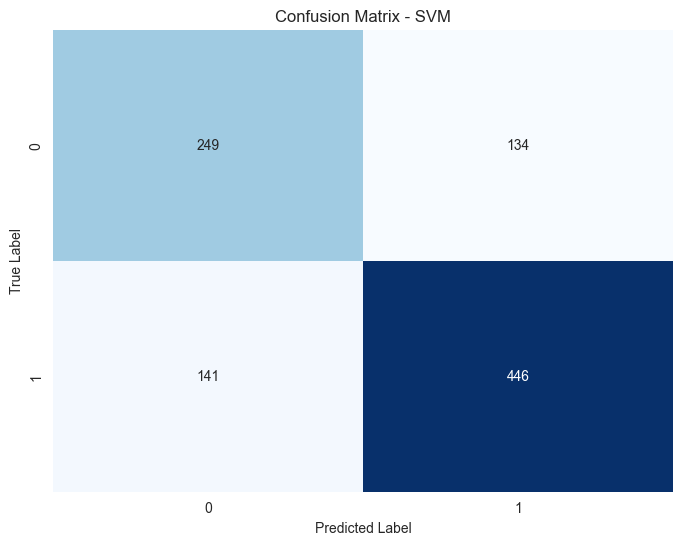

Accuracy: 0.7164948453608248
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       383
           1       0.77      0.76      0.76       587

    accuracy                           0.72       970
   macro avg       0.70      0.70      0.70       970
weighted avg       0.72      0.72      0.72       970

------------------------------------------------------------
Entrenando y evaluando el modelo: AdaBoost


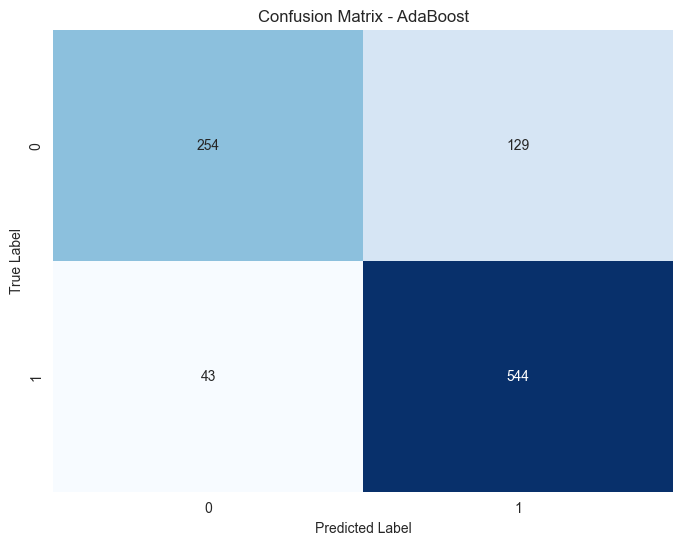

Accuracy: 0.822680412371134
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       383
           1       0.81      0.93      0.86       587

    accuracy                           0.82       970
   macro avg       0.83      0.79      0.81       970
weighted avg       0.83      0.82      0.82       970

------------------------------------------------------------
Entrenando y evaluando el modelo: Logistic Regression


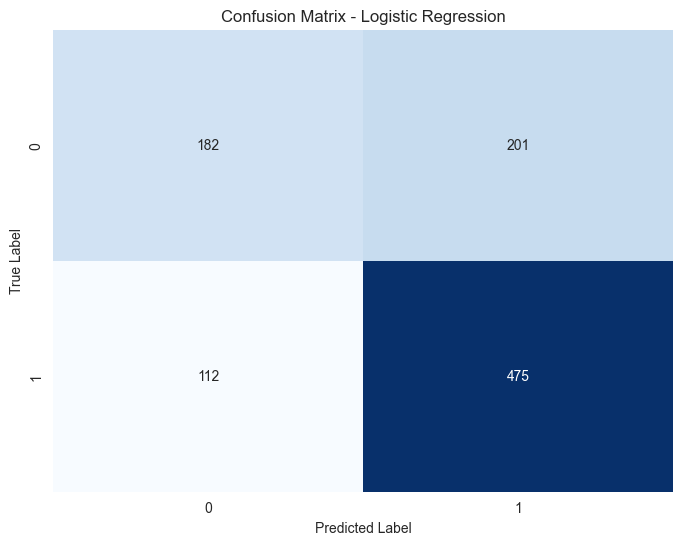

Accuracy: 0.677319587628866
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.48      0.54       383
           1       0.70      0.81      0.75       587

    accuracy                           0.68       970
   macro avg       0.66      0.64      0.64       970
weighted avg       0.67      0.68      0.67       970

------------------------------------------------------------
Entrenando y evaluando el modelo: Gradient Boosting


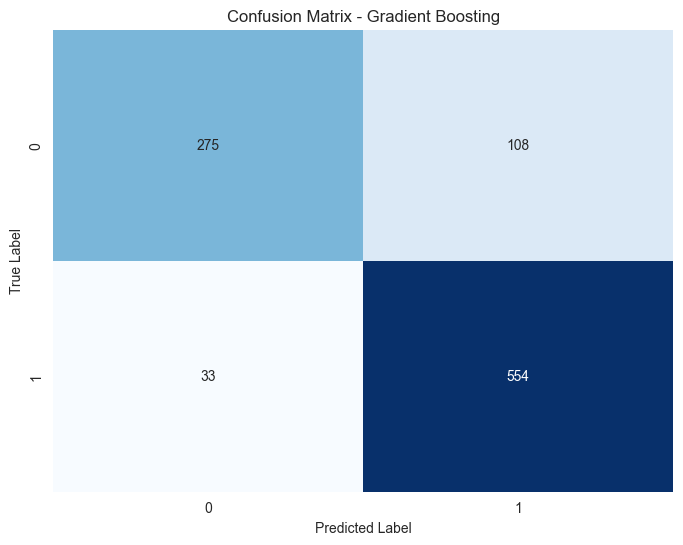

Accuracy: 0.8546391752577319
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       383
           1       0.84      0.94      0.89       587

    accuracy                           0.85       970
   macro avg       0.86      0.83      0.84       970
weighted avg       0.86      0.85      0.85       970

------------------------------------------------------------


In [14]:
# Defino en una Matriz los modelos que voy a comparar 
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Gradient Boosting': GradientBoostingClassifier()
}

# sobre cada modelo uso un ciclo for para evaluarlos uno por uno
for name, model in models.items():
    print(f"Entrenando y evaluando el modelo: {name}")
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


## Comparativa de resultados

In [15]:
# Inicializar un diccionario para almacenar los resultados y podes comparar de una manera mas facil
results = {
    'Model': [],
    'Accuracy': [],
    'Precision (0)': [],
    'Recall (0)': [],
    'F1-Score (0)': [],
    'Precision (1)': [],
    'Recall (1)': [],
    'F1-Score (1)': []
}

# Iterar sobre cada modelo
for name, model in models.items():
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extraer métricas del reporte
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']
    f1_0 = report['0']['f1-score']
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']
    f1_1 = report['1']['f1-score']
    
    # Almacenar los resultados en el diccionario
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision (0)'].append(precision_0)
    results['Recall (0)'].append(recall_0)
    results['F1-Score (0)'].append(f1_0)
    results['Precision (1)'].append(precision_1)
    results['Recall (1)'].append(recall_1)
    results['F1-Score (1)'].append(f1_1)

# Crear un DataFrame a partir del diccionario de resultados
results_df = pd.DataFrame(results)

# Función para resaltar los valores máximos
def highlight_max(dataframe):
    # Aplicar el estilo solo a las columnas numéricas
    styles = pd.DataFrame('', index=dataframe.index, columns=dataframe.columns)
    for col in dataframe.columns[1:]:  # Excluyendo la primera columna 'Model'
        max_val = dataframe[col].max()
        styles[col] = ['background-color: Green' if v == max_val else '' for v in dataframe[col]]
    return styles

# Aplicar el estilo
styled_df = results_df.style.apply(highlight_max, axis=None)

# Mostrar el DataFrame estilizado
styled_df



,Model,Accuracy,Precision (0),Recall (0),F1-Score (0),Precision (1),Recall (1),F1-Score (1)
0,Random Forest,0.837113,0.833828,0.733681,0.780556,0.838863,0.904600,0.870492
1,XGBoost,0.857732,0.849003,0.778068,0.811989,0.862682,0.909710,0.885572
2,KNN,0.779381,0.760000,0.644909,0.697740,0.789147,0.867121,0.826299
3,SVM,0.716495,0.638462,0.650131,0.644243,0.768966,0.759796,0.764353
4,AdaBoost,0.822680,0.855219,0.663185,0.747059,0.808321,0.926746,0.863492
5,Logistic Regression,0.677320,0.619048,0.475196,0.537666,0.702663,0.809199,0.752177
6,Gradient Boosting,0.854639,0.892857,0.718016,0.795948,0.836858,0.943782,0.887110


# XGBoost vs Gradient Boosting

In [13]:
#Quiero Comparar los dos mejores metodos con validacion cruzada#
# Definir los modelos en un diccionario
models = {
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier()
}
# Inicializar un diccionario para almacenar los resultados
results = {}
# Iterar sobre cada modelo
for name, model in models.items():
    
    # Aplicar K-Fold Cross-Validation
    scores = cross_val_score(model, x, y, cv=5)  # cv=5 para 5-Fold Cross-Validation
    
    # Almacenar los resultados en el diccionario
    results[name] = {
        'Fold 1': scores[0],
        'Fold 2': scores[1],
        'Fold 3': scores[2],
        'Fold 4': scores[3],
        'Fold 5': scores[4],
        'Mean Accuracy': scores.mean()
    }

# Crear un DataFrame a partir del diccionario de resultados
results_df = pd.DataFrame.from_dict(results, orient='index')

# Aplicar formato a la tabla
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def format_number(x):
    return f'{x:.3f}'

# Convertir el DataFrame a formato string usando map
formatted_df = results_df[['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']].map(format_number)
formatted_df['Mean Accuracy'] = results_df['Mean Accuracy'].map(format_number)

# Aplicar el resaltado al máximo de cada columna, excepto la columna
styled_df = formatted_df.style.apply(lambda x: highlight_max(x), axis=0)

# Mostrar la tabla con formato
styled_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean Accuracy
XGBoost,0.840,0.867,0.845,0.883,0.836,0.854
Gradient Boosting,0.859,0.875,0.859,0.891,0.851,0.867


## Tamaños de Prueba 

In [15]:
#Quiero ver el comportamiento de mi modelo con difrentes porcentajes de tamaño para prueba
# Definir el modelo de Gradient Boosting
model = GradientBoostingClassifier()

# Rango de test_size
test_sizes = [0.1 + i * 0.05 for i in range(5)]

# Inicializar un diccionario para almacenar los resultados
results = {}

# Iterar sobre cada valor de test_size
for size in test_sizes:

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size, random_state=42)
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Almacenar los resultados en el diccionario
    results[size] = {
        'Accuracy': accuracy,
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1-Score (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1-Score (1)': report['1']['f1-score']
    }

# Crear un DataFrame a partir del diccionario de resultados
results_df = pd.DataFrame.from_dict(results, orient='index')

# Función para resaltar los valores máximos
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

# Aplicar formato a la tabla
styled_df = results_df.style.apply(highlight_max)

# Mostrar la tabla con formato
styled_df


,Accuracy,Precision (0),Recall (0),F1-Score (0),Precision (1),Recall (1),F1-Score (1)
0.100000,0.861856,0.901961,0.726316,0.804665,0.843373,0.949153,0.893142
0.150000,0.859890,0.883117,0.731183,0.800000,0.849095,0.939866,0.892178
0.200000,0.854639,0.892857,0.718016,0.795948,0.836858,0.943782,0.887110
0.250000,0.858086,0.894459,0.719745,0.797647,0.841537,0.946019,0.890724
0.300000,0.854296,0.889868,0.713781,0.792157,0.838162,0.943757,0.887831


## Hiperparametros

In [16]:
# Quiero analizar los Hiperparametros del GradientBoosting
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300], #número de árboles#
    'learning_rate': [0.01, 0.1, 0.2],#controla la contribución de cada árbol
    'max_depth': [3, 4, 5, 6],#número de niveles desde la raíz hasta las hojas
}

# Crear el modelo
model = GradientBoostingClassifier()

# Configurar la búsqueda en rejilla
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)


Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mejor puntuación: 0.8720493872213606


## Carga de Hiperparametros optimos

In [17]:
# Crear y configurar el modelo con los mejores parámetros encontrados
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
model = GradientBoostingClassifier(**best_params)

## Carga de valores optimos

Precisión en los datos de prueba: 0.8762886597938144
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       190
           1       0.86      0.95      0.90       295

    accuracy                           0.88       485
   macro avg       0.89      0.86      0.87       485
weighted avg       0.88      0.88      0.87       485



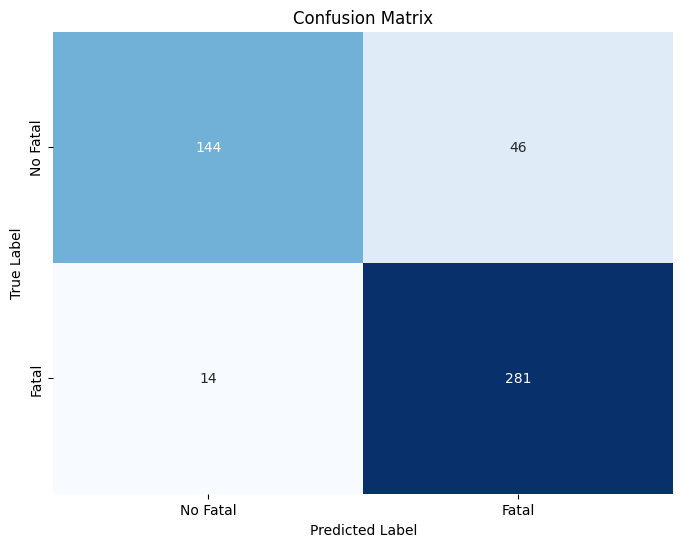

In [18]:
# Vuelvo a realizar los calculos con los nuevos valores optenidos
# Paso 2: Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)# Obte por 0,1 baja el error de predicir no fatal cuando era fatal

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión en los datos de prueba: {accuracy}")
print(f"Informe de clasificación:\n{report}")

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con etiquetas personalizadas
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['No Fatal', 'Fatal'], yticklabels=['No Fatal', 'Fatal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# CONCLUSION 

Mediaten el analisis de mi dataset pude generar y mejorar un metdo que me permita predecir con una precicion 
del 87% cuando un accidete laboral es fatal o no, tambien tiene un buen desempeño a la hora de predecir de forma errone que el accidente no era fatal pero en realidad si lo era.

Esto me permite:

- Usar los resultados para desarrollar estrategias de capacitación y prevención basadas en los factores de riesgo identificados.

- Contribuye al conocimiento sobre los factores que influyen en la gravedad de los accidentes laborales y cómo mitigarlos.

